In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
event = pd.read_csv('titanic_train.csv')

In [3]:
colheading=['UniqueID','TurnedUp','Year','Name','Sex','Age','EventsParticipated','EventsWon','Ticket','Points','Cabin','Residents']
event=pd.read_csv('titanic_train.csv',header=None,skiprows=1,names=colheading)

In [4]:
event.head()

,UniqueID,TurnedUp,Year,Name,Sex,Age,EventsParticipated,EventsWon,Ticket,Points,Cabin,Residents
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


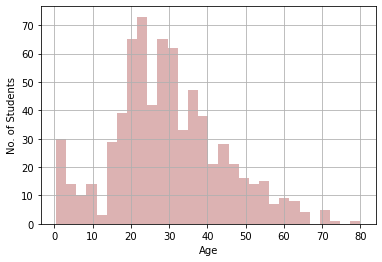

In [5]:
event['Age'].hist(bins=30,histtype='bar',color='darkred',alpha=0.3)
plt.ylabel('No. of Students')
plt.xlabel('Age')
plt.show()

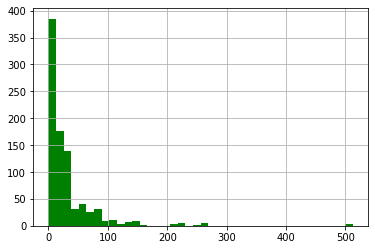

In [6]:
event['Points'].hist(color='green',bins=40)

In [7]:
def empty_age(cols):
    Age = cols[0]
    Year = cols[1]
    
    if pd.isnull(Age):

        if Year == 1:
            return 19

        elif Year == 2:
            return 20

        else:
            return 21

    else:
        return Age

In [8]:
event['Age'] = event[['Age','Year']].apply(empty_age,axis=1)

In [9]:
event.dropna(inplace=True)

In [10]:
sex = pd.get_dummies(event['Sex'],drop_first=True)

In [11]:
sex.head()

,male
1,0
3,0
6,1
10,0
11,0


In [12]:
residents = pd.get_dummies(event['Residents'],drop_first=True)

In [13]:
residents.head()

,Q,S
1,0,0
3,0,1
6,0,1
10,0,1
11,0,1


In [14]:
event.drop(['Sex','Residents','Name','Ticket','Cabin'],axis=1,inplace=True)

In [15]:
event.head()

,UniqueID,TurnedUp,Year,Age,EventsParticipated,EventsWon,Points
1,2,1,1,38.0,1,0,71.2833
3,4,1,1,35.0,1,0,53.1000
6,7,0,1,54.0,0,0,51.8625
10,11,1,3,4.0,1,1,16.7000
11,12,1,1,58.0,0,0,26.5500


In [16]:
event = pd.concat([event,sex,residents],axis=1)

In [17]:
event.head()

,UniqueID,TurnedUp,Year,Age,EventsParticipated,EventsWon,Points,male,Q,S
1,2,1,1,38.0,1,0,71.2833,0,0,0
3,4,1,1,35.0,1,0,53.1000,0,0,1
6,7,0,1,54.0,0,0,51.8625,1,0,1
10,11,1,3,4.0,1,1,16.7000,0,0,1
11,12,1,1,58.0,0,0,26.5500,0,0,1


In [18]:
#train test split
event.drop('TurnedUp',axis=1).head()

,UniqueID,Year,Age,EventsParticipated,EventsWon,Points,male,Q,S
1,2,1,38.0,1,0,71.2833,0,0,0
3,4,1,35.0,1,0,53.1000,0,0,1
6,7,1,54.0,0,0,51.8625,1,0,1
10,11,3,4.0,1,1,16.7000,0,0,1
11,12,1,58.0,0,0,26.5500,0,0,1


In [19]:
event['TurnedUp'].head()

1     1
3     1
6     0
10    1
11    1
Name: TurnedUp, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(event.drop('TurnedUp',axis=1), 
                                                    event['TurnedUp'], test_size=0.30, 
                                                    random_state=101)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logmodel = LogisticRegression()

In [24]:
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
predictions = logmodel.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
accuracy=confusion_matrix(y_test,predictions)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8032786885245902

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.72      0.65      0.68        20
           1       0.84      0.88      0.86        41

    accuracy                           0.80        61
   macro avg       0.78      0.76      0.77        61
weighted avg       0.80      0.80      0.80        61

